In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Load dataset from csv file using pandas
df = pd.read_csv('E:\datasets\Crop Recommendation Dataset\crop_recommendation.csv')

### Print the first 5 rows of the dataset
print(df.head())
print(df.shape)

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
(2200, 8)


In [4]:
# print intervals of each feature
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


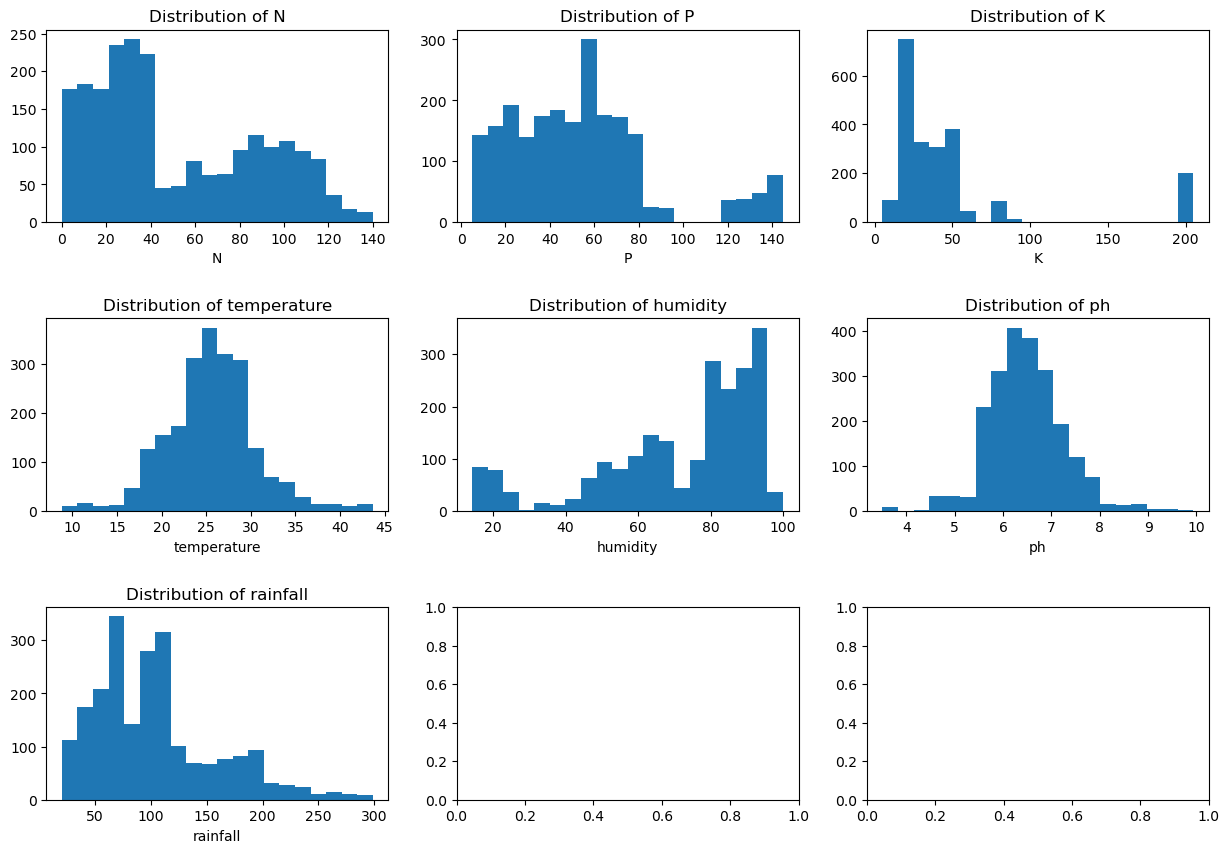

In [13]:
# create 3 subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(df.columns[:-1]):
    ax[i//3, i%3].hist(df[feature], bins=20)
    ax[i//3, i%3].set_xlabel(feature)
    ax[i//3, i%3].set_title('Distribution of {}'.format(feature))

In [26]:
# split dataset into train, test and validation sets
from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis=1)
y = df['label']

# split dataset into train, test and validation sets 70 20 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125)

# print the shape of the train, test and validation sets
print(X_train.shape, X_test.shape, X_val.shape)

(1540, 7) (440, 7) (220, 7)


In [27]:
# normalize the data using z score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [28]:
# transform output labels to one hot encoded format
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.values.reshape(-1, 1)).toarray()
y_val = encoder.transform(y_val.values.reshape(-1, 1)).toarray()

In [32]:
# print some input and output values
print(X_train[0], y_train[0])

# print y_train shape
print(y_train.shape)

[-0.48865216  2.51194423  3.03624798 -0.54715998  0.95992291 -0.83726186
  0.24646005] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1540, 22)


Epoch 1/100
49/49 [==============================] - 1s 9ms/step - loss: 2.8499 - accuracy: 0.1922 - val_loss: 2.5592 - val_accuracy: 0.3591
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: 2.3139 - accuracy: 0.4253 - val_loss: 2.0808 - val_accuracy: 0.5545
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 1.8346 - accuracy: 0.6175 - val_loss: 1.6507 - val_accuracy: 0.6636
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 1.4300 - accuracy: 0.7474 - val_loss: 1.3052 - val_accuracy: 0.7455
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 1.1192 - accuracy: 0.8227 - val_loss: 1.0434 - val_accuracy: 0.7682
Epoch 6/100
49/49 [==============================] - 0s 3ms/step - loss: 0.8926 - accuracy: 0.8727 - val_loss: 0.8572 - val_accuracy: 0.8136
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 0.7336 - accuracy: 0.8838 - val_loss: 0.7201 - val_accuracy: 0.8727
Epoch 8/100
4

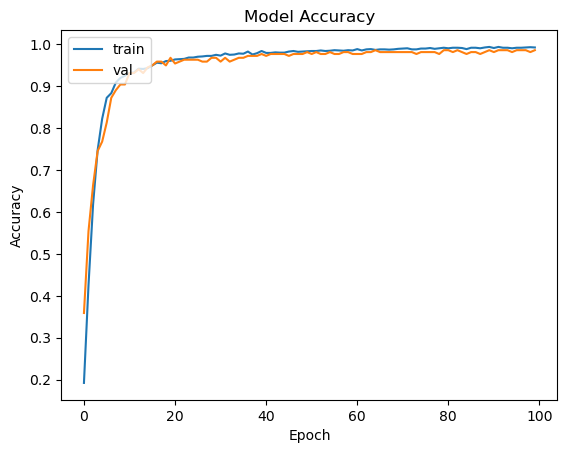

In [37]:
# train a NN model using tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(7,)))
# add output layer
model.add(Dense(22, activation='softmax'))

# compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
# test on test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {}'.format(accuracy))

14/14 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9864
Test accuracy: 0.9863636493682861


# Detect rice leaf disease

In [1]:
# load photos of crops
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = 'E:\datasets\\rice leaf\\archive\\rice_leaf_diseases'
images = []
labels = []
for folder in os.listdir(path):
    for file in os.listdir(os.path.join(path, folder)):
        image = cv2.imread(os.path.join(path, folder, file))
        image = cv2.resize(image, (128, 128))
        images.append(image)
        labels.append(folder)
    
images = np.array(images)
labels = np.array(labels)

# print the shape of images and labels
print(images.shape, labels.shape)

(120, 128, 128, 3) (120,)


In [2]:
def plotExamples(images, labels, cmap=None):
    # plot 5 images from each class
    fig, ax = plt.subplots(3, 5, figsize=(15, 6))
    plt.subplots_adjust(hspace=0.5)

    for i, label in enumerate(np.unique(labels)):
        for j, image in enumerate(images[labels == label][:5]):
            ax[i, j].imshow(image, cmap=cmap)
            ax[i, j].set_title(label)

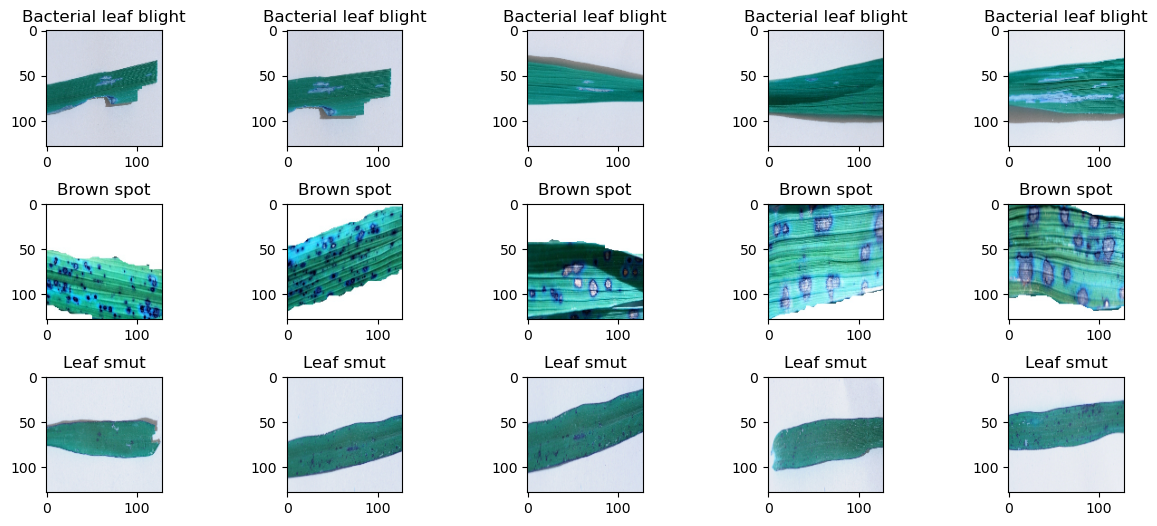

In [3]:
plotExamples(images, labels)

(120, 128, 128)


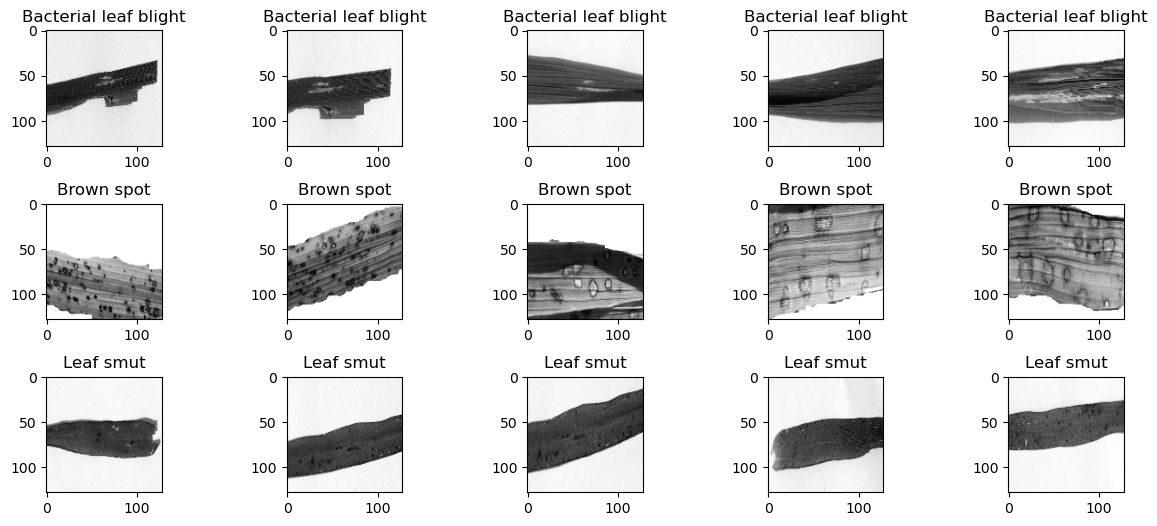

In [4]:
# change the images to grayscale
# imagesGrayscale = np.mean(images, axis=3)

grayscale_images = np.dot(images[...,:3], [0.2989, 0.5870, 0.1140])

# print the shape of grayscale images
print(grayscale_images.shape)

plotExamples(grayscale_images, labels, cmap='gray')


Text(0.5, 1.0, 'Distribution of pixel values')

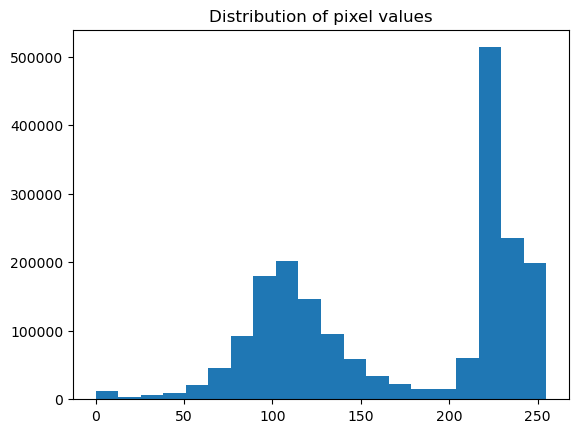

In [5]:
# plot grayscale range of values of pixels
plt.hist(grayscale_images.flatten(), bins=20)
plt.title('Distribution of pixel values')


In [6]:
# transform labels to one hot encoded format using sklearn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
labels_onehot = encoder.fit_transform(labels.reshape(-1, 1)).toarray()

# print the shape of labels
print(labels_onehot.shape)

# print the first 5 labels
print(labels_onehot[:5])

(120, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [7]:
# split dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_onehot, test_size=0.2)

# print the shape of the train and test sets
print(X_train.shape, X_test.shape)

(96, 128, 128, 3) (24, 128, 128, 3)


In [30]:
# create a CNN model using tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100
3/3 [==============================] - 4s 968ms/step - loss: 142.6121 - accuracy: 0.3438 - val_loss: 19.3728 - val_accuracy: 0.3750
Epoch 2/100
3/3 [==============================] - 2s 612ms/step - loss: 45.1291 - accuracy: 0.4479 - val_loss: 7.3643 - val_accuracy: 0.2500
Epoch 3/100
3/3 [==============================] - 2s 608ms/step - loss: 11.9416 - accuracy: 0.3542 - val_loss: 1.1986 - val_accuracy: 0.3750
Epoch 4/100
3/3 [==============================] - 1s 503ms/step - loss: 1.5223 - accuracy: 0.3333 - val_loss: 1.1039 - val_accuracy: 0.2500
Epoch 5/100
3/3 [==============================] - 2s 627ms/step - loss: 1.0436 - accuracy: 0.4375 - val_loss: 1.0989 - val_accuracy: 0.1667
Epoch 6/100
3/3 [==============================] - 2s 594ms/step - loss: 1.1040 - accuracy: 0.3854 - val_loss: 1.0936 - val_accuracy: 0.2917
Epoch 7/100
3/3 [==============================] - 1s 502ms/step - loss: 1.0761 - accuracy: 0.5000 - val_loss: 1.0891 - val_accuracy: 0.3333
Epoch 8/

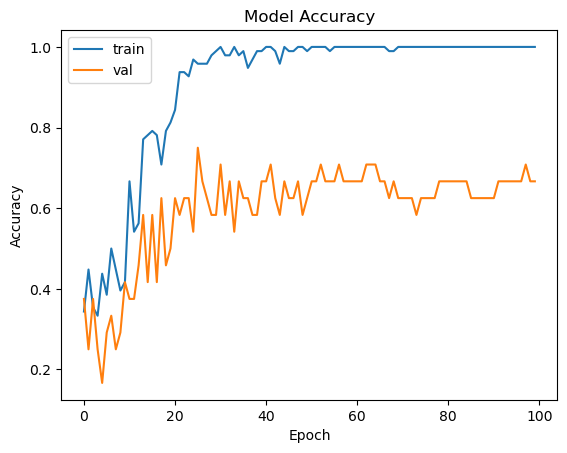

In [31]:
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
# output the prediction, confidence score and actual label for all the test images
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

for i in range(len(y_pred)):
    print('Predicted: {}, Confidence: {:.3f}, Actual: {}'.format(y_pred_labels[i], np.max(y_pred[i]), y_test_labels[i]))
    

1/1 [==============================] - 0s 175ms/step
Predicted: 1, Confidence: 0.987, Actual: 1
Predicted: 0, Confidence: 0.999, Actual: 0
Predicted: 1, Confidence: 0.974, Actual: 1
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 1, Confidence: 0.997, Actual: 1
Predicted: 2, Confidence: 0.771, Actual: 2
Predicted: 1, Confidence: 0.964, Actual: 1
Predicted: 1, Confidence: 0.967, Actual: 0
Predicted: 1, Confidence: 0.541, Actual: 0
Predicted: 2, Confidence: 0.944, Actual: 0
Predicted: 0, Confidence: 0.921, Actual: 1
Predicted: 1, Confidence: 0.999, Actual: 1
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 0, Confidence: 0.999, Actual: 2
Predicted: 2, Confidence: 0.986, Actual: 1
Predicted: 2, Confidence: 0.962, Actual: 1
Predicted: 2, Confidence: 0.963, Actual: 2
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 0, Confidence: 0.993, Actual: 0
Predicted: 2, Confidence: 0.685, Actual: 2
Predicted: 1, Confidence: 0.569, Actual: 1
P

In [33]:
# show the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_, y_pred)
print(cm)


1/1 [==============================] - 0s 70ms/step
[[6 2 1]
 [1 6 2]
 [1 1 4]]


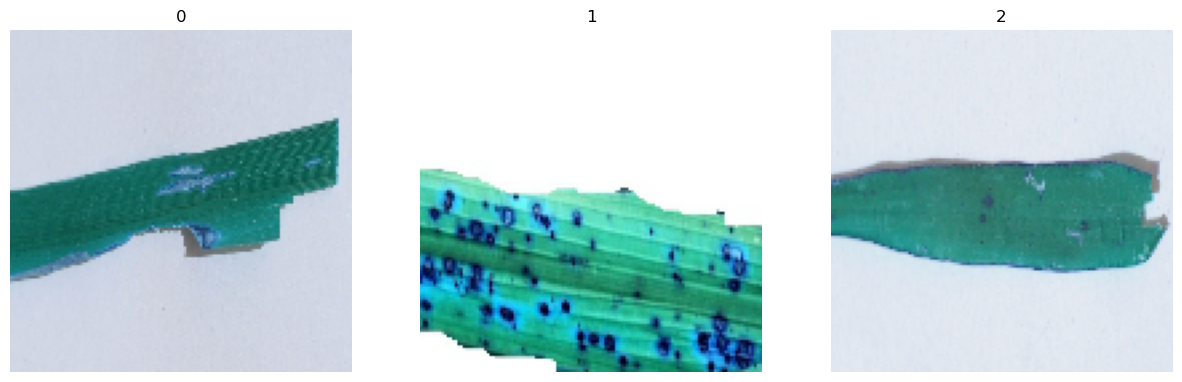

In [34]:
# print 1 of each class of images
# also print the one hot encoded label
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
plt.subplots_adjust(hspace=0.5)

for i, label in enumerate(np.unique(labels)):
    ax[i].imshow(images[labels == label][0])
    ax[i].set_title(encoder.transform([[label]]).toarray().argmax())
    ax[i].axis('off')



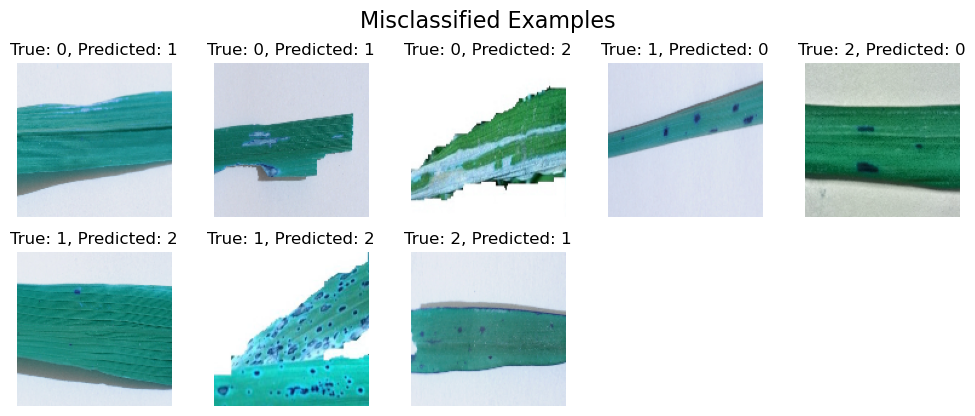

In [35]:
# plot all the missclassified examples
import matplotlib.pyplot as plt

misclassified_indices = np.where(y_pred != y_test_)[0]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Misclassified Examples', fontsize=16)

for i, index in enumerate(misclassified_indices):
    ax = fig.add_subplot(5, 5, i + 1)
    ax.imshow(X_test[index])
    ax.set_title(f'True: {y_test_[index]}, Predicted: {y_pred[index]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

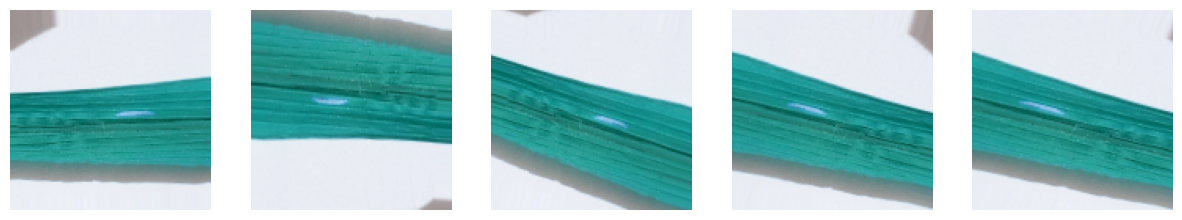

In [21]:
# augment the dataset using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,       # Rotate the image by a random degree within the given range
    width_shift_range=0.2,   # Shift the image horizontally by a fraction of total width
    height_shift_range=0.2,  # Shift the image vertically by a fraction of total height
    shear_range=0.2,         # Apply shearing transformation
    zoom_range=0.2,          # Apply zooming transformation
    horizontal_flip=True,    # Flip the image horizontally
    fill_mode='nearest'      # Fill any newly created pixels after rotation or shifting
)

# plot some augmented images
fig, ax = plt.subplots(1, 5, figsize=(15, 6))
plt.subplots_adjust(hspace=0.5)

for i, image in enumerate(augmented_images[:5]):
    ax[i].imshow(image.astype('int'))
    ax[i].axis('off')



In [22]:
# generate augmented images
augmented_images = []
augmented_labels = []

for image, label in zip(X_train, y_train):
    for i, augmented_image in enumerate(datagen.flow(image.reshape(1, 128, 128, 3))):
        if i == 20:
            break
        augmented_images.append(augmented_image[0])
        augmented_labels.append(label)

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# print the shape of augmented images and labels
print(augmented_images.shape, augmented_labels.shape)

(1920, 128, 128, 3) (1920, 3)


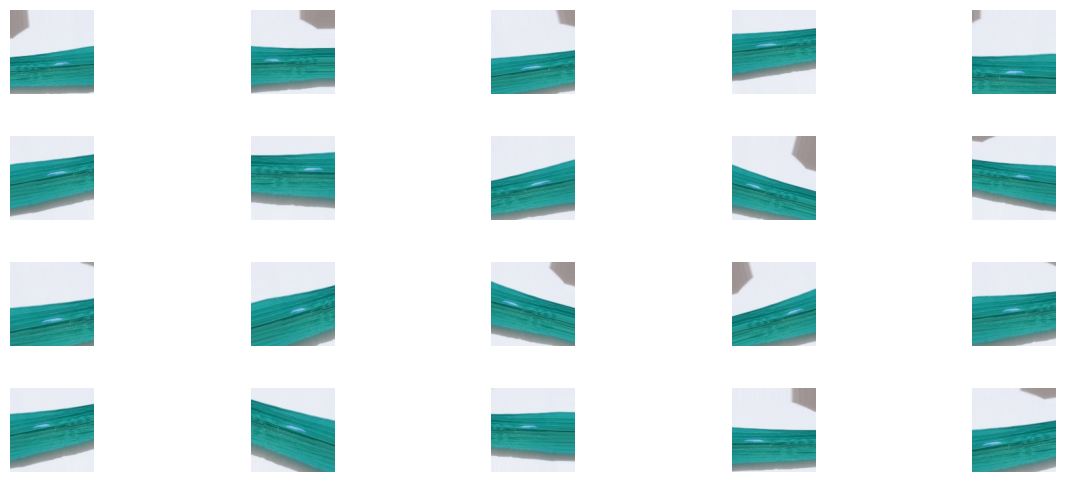

In [27]:
# plot some augmented images
fig, ax = plt.subplots(4, 5, figsize=(15, 6))
plt.subplots_adjust(hspace=0.5)

for i, image in enumerate(augmented_images[:20]):
    ii = i // 5
    jj = i % 5
    ax[ii][jj].imshow(image.astype('int'))
    ax[ii][jj].axis('off')




Epoch 1/300
3/3 [==============================] - 1s 349ms/step - loss: 0.3694 - accuracy: 0.8333 - val_loss: 1.4434 - val_accuracy: 0.7917
Epoch 2/300
3/3 [==============================] - 1s 324ms/step - loss: 0.2649 - accuracy: 0.8750 - val_loss: 0.7505 - val_accuracy: 0.8333
Epoch 3/300
3/3 [==============================] - 1s 276ms/step - loss: 0.2403 - accuracy: 0.9167 - val_loss: 0.7278 - val_accuracy: 0.7917
Epoch 4/300
3/3 [==============================] - 1s 308ms/step - loss: 0.1319 - accuracy: 0.9583 - val_loss: 1.0522 - val_accuracy: 0.9167
Epoch 5/300
3/3 [==============================] - 1s 315ms/step - loss: 0.1133 - accuracy: 0.9688 - val_loss: 1.4922 - val_accuracy: 0.8750
Epoch 6/300
3/3 [==============================] - 1s 333ms/step - loss: 0.0943 - accuracy: 0.9688 - val_loss: 1.5994 - val_accuracy: 0.9167
Epoch 7/300
3/3 [==============================] - 2s 620ms/step - loss: 0.1195 - accuracy: 0.9479 - val_loss: 1.5267 - val_accuracy: 0.9167
Epoch 8/300
3

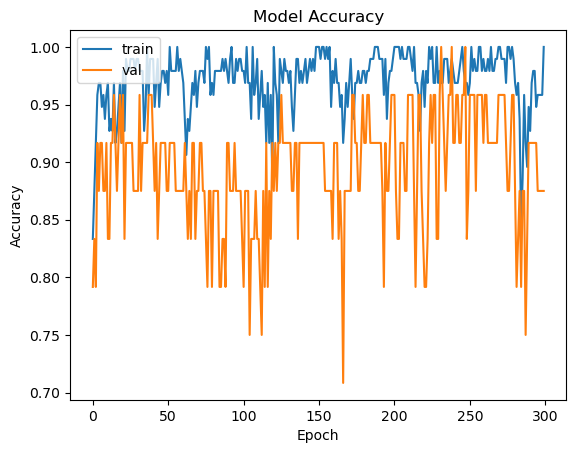

In [33]:
# augment just the training set
datagen.fit(X_train)

# train the model using augmented images
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=300, validation_data=(X_test, y_test))

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/10
3/3 [==============================] - 2s 627ms/step - loss: 0.0584 - accuracy: 0.9792 - val_loss: 1.0566 - val_accuracy: 0.9167
Epoch 2/10
3/3 [==============================] - 2s 646ms/step - loss: 0.0397 - accuracy: 0.9896 - val_loss: 1.1205 - val_accuracy: 0.9583
Epoch 3/10
3/3 [==============================] - 2s 791ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 1.1850 - val_accuracy: 0.9167
Epoch 4/10
3/3 [==============================] - 2s 720ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 1.2904 - val_accuracy: 0.8750
Epoch 5/10
3/3 [==============================] - 2s 609ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.3231 - val_accuracy: 0.8750
Epoch 6/10
3/3 [==============================] - 2s 655ms/step - loss: 0.1078 - accuracy: 0.9583 - val_loss: 1.2744 - val_accuracy: 0.9583
Epoch 7/10
3/3 [==============================] - 2s 653ms/step - loss: 0.0396 - accuracy: 0.9792 - val_loss: 1.3829 - val_accuracy: 0.9583
Epoch 8/10
3/3 [====

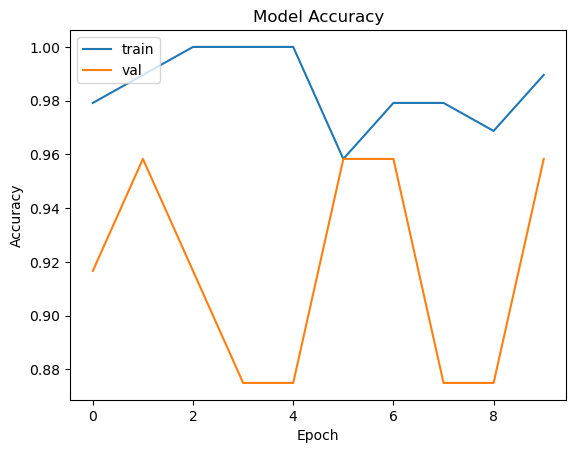

In [34]:
# augment just the training set
datagen.fit(X_train)

# train the model using augmented images
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
# show the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_, y_pred)
print(cm)


1/1 [==============================] - 0s 211ms/step
[[7 0 0]
 [0 7 1]
 [0 0 9]]


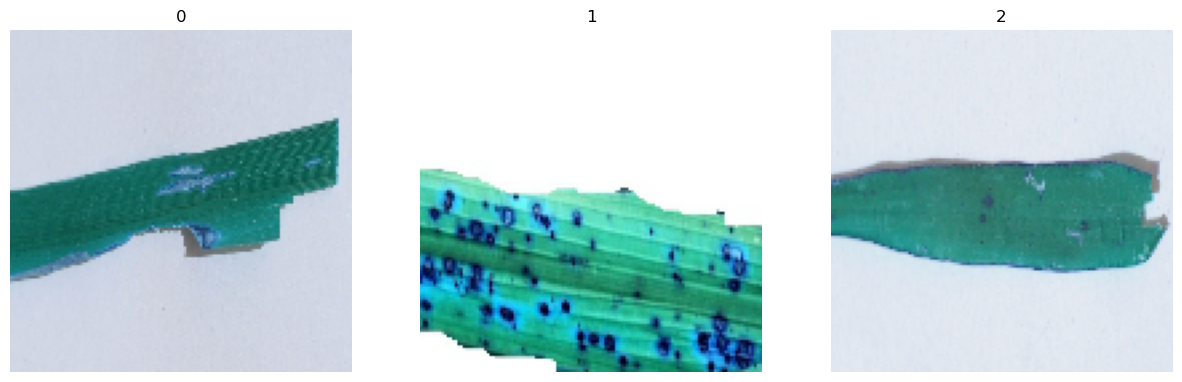

In [37]:
# print 1 of each class of images
# also print the one hot encoded label
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
plt.subplots_adjust(hspace=0.5)

for i, label in enumerate(np.unique(labels)):
    ax[i].imshow(images[labels == label][0])
    ax[i].set_title(encoder.transform([[label]]).toarray().argmax())
    ax[i].axis('off')



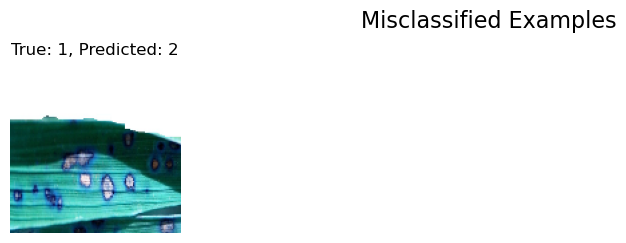

In [38]:
# plot all the missclassified examples
import matplotlib.pyplot as plt

misclassified_indices = np.where(y_pred != y_test_)[0]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Misclassified Examples', fontsize=16)

for i, index in enumerate(misclassified_indices):
    ax = fig.add_subplot(5, 5, i + 1)
    ax.imshow(X_test[index])
    ax.set_title(f'True: {y_test_[index]}, Predicted: {y_pred[index]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [39]:
# output the prediction, confidence score and actual label for all the test images
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

for i in range(len(y_pred)):
    print('Predicted: {}, Confidence: {:.3f}, Actual: {}'.format(y_pred_labels[i], np.max(y_pred[i]), y_test_labels[i]))
    

1/1 [==============================] - 0s 65ms/step
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 1, Confidence: 1.000, Actual: 1
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 2, Confidence: 0.982, Actual: 2
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 2, Confidence: 0.998, Actual: 2
Predicted: 1, Confidence: 1.000, Actual: 1
Predicted: 2, Confidence: 1.000, Actual: 2
Predicted: 1, Confidence: 0.970, Actual: 1
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 2, Confidence: 1.000, Actual: 2
Predicted: 1, Confidence: 0.973, Actual: 1
Predicted: 2, Confidence: 1.000, Actual: 2
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 2, Confidence: 1.000, Actual: 2
Predicted: 2, Confidence: 1.000, Actual: 2
Predicted: 1, Confidence: 0.727, Actual: 1
Predicted: 0, Confidence: 1.000, Actual: 0
Predicted: 2, Confidence: 0.999, Actual: 2
Predicted: 1, Confidence: 1.000, Actual: 1
Predicted: 2, Confidence: 1.000, Actual: 2
Pr